In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

red_wines = pd.read_csv("winequality-red.csv", sep = ";")
white_wines = pd.read_csv("winequality-white.csv", sep =";")


# Mental note (procedure)
* convert type of wine into numbers 
* run heatmap to see correlation between components and type of wine
1) run the machine learning model to determine type of wine as it is (copy paste)
2) check results
3) run machine model removing features with low correlation to type of wine
3) check feature by feature for outliers
4) perform hypothesis tests to see if the the difference in chemical composition is significant in each case.
5) remove columns from insignificant features. 
4) run machine learning model again with the new results
5) split data with validation 

In [ ]:
# formatting
red_wines.columns= red_wines.columns.str.replace(' ','_')
white_wines.columns = white_wines.columns.str.replace(' ','_')

#Quality categories
red_wines ['quality_label'] = red_wines['quality'].apply(lambda value: 'low' if value <= 5 
                                                        else 'medium' if value <= 7 
                                                        else 'high')

red_wines['quality_label'] = pd.Categorical(red_wines['quality_label'],
categories=['low', 'medium', 'high'])

white_wines ['quality_label'] = white_wines['quality'].apply(lambda value: 'low' if value <= 5 
                                                        else 'medium' if value <= 7 
                                                        else 'high')

white_wines["quality_label"] = pd.Categorical(white_wines["quality_label"], categories = ["low","medium","high"])

# Type of wine categories
red_wines ["type"] = 'Red Wine'
red_wines['type'] = pd.Categorical(red_wines['type'],
categories=["Red Wine","White Wine"])

white_wines ["type"] = 'White Wine'
white_wines['type'] = pd.Categorical(white_wines['type'],
categories=["Red Wine","White Wine"])

# merge datasets
white_and_red = pd.merge(red_wines, white_wines, how = "outer")

In [ ]:
white_and_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,type
0,3.8,0.310,0.02,11.1,0.036,20.0,114.0,0.99248,3.75,0.44,12.4,6,medium,White Wine
1,3.9,0.225,0.40,4.2,0.030,29.0,118.0,0.98900,3.57,0.36,12.8,8,high,White Wine
2,4.2,0.170,0.36,1.8,0.029,93.0,161.0,0.98999,3.65,0.89,12.0,7,medium,White Wine
3,4.2,0.215,0.23,5.1,0.041,64.0,157.0,0.99688,3.42,0.44,8.0,3,low,White Wine
4,4.4,0.320,0.39,4.3,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,8,high,White Wine


# Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
white_and_red['type'] = le.fit_transform(white_and_red['type'])

white_and_red["type"].head()
white_and_red["type"].tail()

6492    0
6493    0
6494    0
6495    0
6496    0
Name: type, dtype: int64

# Split data


In [ ]:
# X=white_and_red.drop(["type","quality_label"], axis=1)
white_and_red

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,z_score
0,3.8,0.310,0.02,11.1,0.036,20.0,114.0,0.99248,3.75,0.44,12.4,6,-2.634589
1,3.9,0.225,0.40,4.2,0.030,29.0,118.0,0.98900,3.57,0.36,12.8,8,-2.557448
2,4.2,0.170,0.36,1.8,0.029,93.0,161.0,0.98999,3.65,0.89,12.0,7,-2.326026
3,4.2,0.215,0.23,5.1,0.041,64.0,157.0,0.99688,3.42,0.44,8.0,3,-2.326026
4,4.4,0.320,0.39,4.3,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,8,-2.171745
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,6.390863
6493,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,6.390863
6494,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,6.468004
6495,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7,6.468004


# Outliers


In [ ]:
# for both white and red
white_and_red['fixed_acidity'].mean()

np.float64(7.215307064799139)

6369    11.2
6370    11.2
6371    11.2
6372    11.2
6373    11.2
        ... 
6492    15.5
6493    15.5
6494    15.6
6495    15.6
6496    15.9
Name: fixed_acidity, Length: 128, dtype: float64
0        3.8
1        3.9
2        4.2
3        4.2
4        4.4
        ... 
6364    11.1
6365    11.1
6366    11.1
6367    11.1
6368    11.1
Name: fixed_acidity, Length: 6369, dtype: float64


<Axes: >

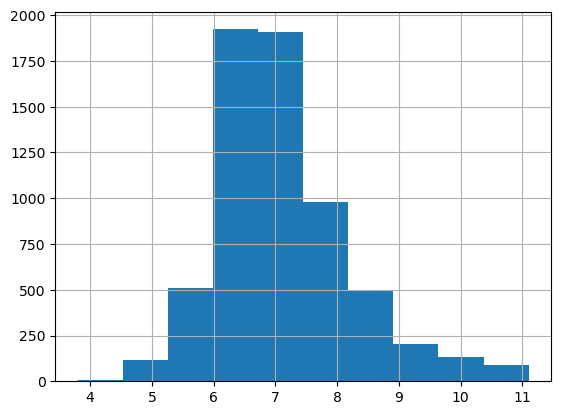

In [ ]:
from scipy.stats import zscore

white_and_red['z_score'] = zscore(white_and_red['fixed_acidity'])
outliers_f_a = white_and_red[white_and_red['z_score'].abs() > 3] 
print(outliers_f_a["fixed_acidity"])

f_a_nooutliers= white_and_red[white_and_red['z_score'].abs() < 3] 
print(f_a_nooutliers["fixed_acidity"])

f_a_nooutliers["fixed_acidity"].hist()


<Axes: >

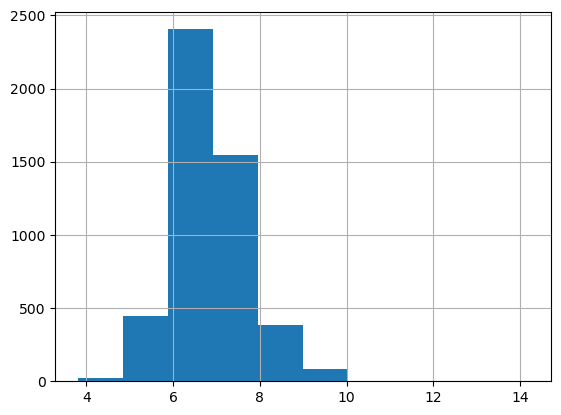

In [ ]:
white_wines['fixed_acidity'].hist()

98       9.8
169      9.8
207     10.2
358     10.0
873     10.3
1053     9.4
1123     9.8
1124     9.6
1178     9.8
1214     9.7
1228     9.4
1239    10.3
1263     9.6
1307     9.7
1309     9.4
1312     9.6
1372    10.7
1373    10.7
1423     9.8
1526    14.2
1580     9.8
1758     9.6
1790     9.4
1801     9.4
1856    10.0
1900    10.0
1951     9.9
1961     9.5
2030     9.5
2050    11.8
2083     9.4
2154     9.8
2162     9.9
2266     9.4
2308     9.4
2312     9.4
2378     9.4
2404     9.8
2668     9.6
2872     4.2
3094     9.7
3095     9.7
3265     4.2
3307     9.4
4259     3.8
4787     3.9
Name: fixed_acidity, dtype: float64


<Axes: >

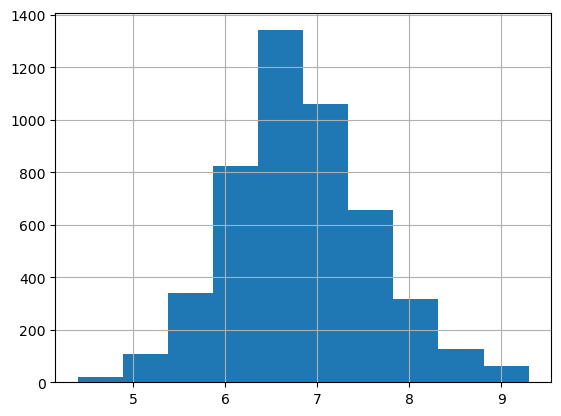

In [ ]:
# distinguishing per type of wine
white_wines['z_score'] = zscore(white_wines['fixed_acidity'])
outliers_ww_f_a = white_wines[white_wines['z_score'].abs() > 3] 
print(outliers_ww_f_a["fixed_acidity"])

ww_f_a_norm= white_wines[white_wines['z_score'].abs() < 3] 
# print(ww_f_a_norm["fixed_acidity"])

ww_f_a_norm["fixed_acidity"].hist()
